## **ICR - Identifying Age-Related Conditions Dataset** 

Questions I have for the group: 

1. What should we do with the features that have lots of nulls? ('BQ' and 'EL')
2. How do we choose hoe many folds?
3. When we split data, columns become objects. Maybe delete the non-numeric one? Yes, that worked. Do we want to include it? Is there a work-around?

#### ``Objectives``

#### ``Motivation``

#### ``Data``

### Step 1: Import libraries

In [1]:
import tensorflow as tf
import tensorflow_decision_forests as tfdf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os


from sklearn.model_selection import KFold

2023-06-16 13:02:11.237369: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Step 2: Define functions

### Step 3: Read data

In [2]:
#set working directory
os.chdir('/Users/ecompu/Library/CloudStorage/OneDrive-Personal/Berkeley/W207_Machine_Learning/mids-207-final-project-summer23-Burzon-Brown-Caldera-Gomez/icr-identify-age-related-conditions/')

dataset_df = pd.read_csv('train.csv')
print("Full dataset shape is {}".format(dataset_df.shape)) 

Full dataset shape is (617, 58)


### Step 4: Preprocess data

In [3]:
# check column names
dataset_df.columns

Index(['Id', 'AB', 'AF', 'AH', 'AM', 'AR', 'AX', 'AY', 'AZ', 'BC', 'BD ', 'BN',
       'BP', 'BQ', 'BR', 'BZ', 'CB', 'CC', 'CD ', 'CF', 'CH', 'CL', 'CR', 'CS',
       'CU', 'CW ', 'DA', 'DE', 'DF', 'DH', 'DI', 'DL', 'DN', 'DU', 'DV', 'DY',
       'EB', 'EE', 'EG', 'EH', 'EJ', 'EL', 'EP', 'EU', 'FC', 'FD ', 'FE', 'FI',
       'FL', 'FR', 'FS', 'GB', 'GE', 'GF', 'GH', 'GI', 'GL', 'Class'],
      dtype='object')

``split data into training and test``

In [12]:
# define outcome #
##################
y = dataset_df['Class'].values

# define features #
###################
columns = [i for i in dataset_df.columns if i not in ["Id", "EJ",'Class']]

X = dataset_df[columns].values

# split #
#########
split = (0.7,0.3) #70% training and 30% test: CHECK PAPERS
shuffle = np.random.permutation(np.arange(y.shape[0])) 
X, y = X[shuffle], y[shuffle]

splits = np.multiply(len(y), split).astype(int) 
X_train, X_test = np.split(X, [splits[0]])
y_train, y_test = np.split(y, [splits[0]])


# df for y_train and X_train #
##############################
# easier for EDA later on
df_train = pd.concat(
    [pd.DataFrame(y_train), pd.DataFrame(X_train)],
    axis=1
)

# rename columns
df_train.columns=['Class', 'AB', 'AF', 'AH', 'AM', 'AR', 'AX', 'AY', 'AZ', 'BC', 'BD ', 'BN',
       'BP', 'BQ', 'BR', 'BZ', 'CB', 'CC', 'CD ', 'CF', 'CH', 'CL', 'CR', 'CS',
       'CU', 'CW ', 'DA', 'DE', 'DF', 'DH', 'DI', 'DL', 'DN', 'DU', 'DV', 'DY',
       'EB', 'EE', 'EG', 'EH', 'EL', 'EP', 'EU', 'FC', 'FD ', 'FE', 'FI',
       'FL', 'FR', 'FS', 'GB', 'GE', 'GF', 'GH', 'GI', 'GL']

### Step 5: EDA


1. Columns: 1 Class column (0/1) and 55 features (we dropped the only non-numeric one: EJ)
2. Check data types: Features are objects, Label 'Class' is int64
3. Count number of nulls per feature: 'BQ' and 'EL' have the largest number of nulls (48 and 48, respectively). Other features with nulls are: 'CC','FS','FC'
4. Check for duplicates: 
5. Summary statistics: The distributions of the features vary, so we would probably benefit from standarization. 
6. Histogram of variables: The labels show class imbalance. 


In [13]:
# Look at the dataset
df_train.head()

,Class,AB,AF,AH,AM,AR,AX,AY,AZ,BC,...,FI,FL,FR,FS,GB,GE,GF,GH,GI,GL
0,0,0.564036,4535.53254,95.424513,42.016999,8.138688,5.253387,0.038367,7.953124,1.229900,...,11.218955,5.470930,1.56078,1.178502,25.217722,72.611063,410.058126,30.575457,27.944780,0.078158
1,0,0.848190,5634.27304,85.200147,75.679840,8.138688,3.782793,0.025578,16.139422,1.229900,...,8.501046,3.221692,1.36300,0.074503,30.743110,133.413276,40502.028400,28.614490,49.709044,0.297000
2,0,0.209377,6440.59284,86.349735,12.620275,8.138688,3.224676,0.044762,8.747176,3.036096,...,9.680828,3.743118,1.74435,0.338650,16.641278,72.611063,2084.121333,40.625878,64.081380,0.281898
3,0,0.269199,3032.58912,85.200147,20.703445,8.138688,3.986550,0.135198,15.049176,7.316148,...,9.636724,0.173229,1.20872,0.880490,35.933626,72.611063,124340.327900,33.529931,7.767440,21.978000
4,0,0.299110,1561.99021,85.200147,12.939266,8.138688,4.358628,0.025578,12.440148,2.892022,...,9.487873,2.069300,1.80177,0.067730,18.817946,72.611063,20685.982260,38.158855,22.458704,0.371250


In [6]:
# Check datatypes for each column
df_train.dtypes

Class     int64
AB       object
AF       object
AH       object
AM       object
AR       object
AX       object
AY       object
AZ       object
BC       object
BD       object
BN       object
BP       object
BQ       object
BR       object
BZ       object
CB       object
CC       object
CD       object
CF       object
CH       object
CL       object
CR       object
CS       object
CU       object
CW       object
DA       object
DE       object
DF       object
DH       object
DI       object
DL       object
DN       object
DU       object
DV       object
DY       object
EB       object
EE       object
EG       object
EH       object
EJ       object
EL       object
EP       object
EU       object
FC       object
FD       object
FE       object
FI       object
FL       object
FR       object
FS       object
GB       object
GE       object
GF       object
GH       object
GI       object
GL       object
dtype: object

In [14]:
# Find which columns have missing values 
sum_null = df_train.isnull().sum()
sum_null[sum_null!=0]

BQ    48
CC     1
EL    48
FC     1
FS     2
dtype: int64

In [31]:
# Check whether we have duplicated data: no 
df_train.duplicated().sum()


0

In [15]:
# summary statistics for the numeric columns 
df_train.describe()

,Class,AB,AF,AH,AM,AR,AX,AY,AZ,BC,...,FI,FL,FR,FS,GB,GE,GF,GH,GI,GL
count,431.000000,431.000000,431.000000,431.000000,431.000000,431.000000,431.000000,431.000000,431.000000,431.000000,...,431.000000,431.000000,431.000000,429.000000,431.000000,431.000000,431.000000,431.000000,431.000000,431.000000
mean,0.185615,0.496521,3562.623045,122.281574,40.910256,10.377663,5.605805,0.067312,10.492077,8.067622,...,10.256386,5.808334,1.554479,0.445423,20.777884,132.531865,13950.733403,31.560745,50.359092,7.828497
std,0.389247,0.523903,2451.923611,147.971279,75.986706,12.272414,2.646882,0.498178,4.317063,71.449334,...,3.073471,11.476867,4.025836,1.539992,10.710902,136.854968,18702.272903,9.985728,37.205306,10.112113
min,0.000000,0.081187,192.593280,85.200147,3.177522,8.138688,0.699861,0.025578,3.396778,1.229900,...,3.583450,0.173229,0.497060,0.067730,4.102182,72.611063,13.038894,9.432735,3.150700,0.001129
25%,0.000000,0.258517,2220.406870,85.200147,12.806095,8.138688,4.216884,0.025578,8.076013,1.229900,...,8.578228,0.173229,0.534325,0.067730,13.641383,72.611063,2638.206531,24.616276,22.757056,0.124082
50%,0.000000,0.358932,3124.575740,85.200147,20.762288,8.138688,5.076207,0.025578,10.341582,1.229900,...,9.984043,3.262465,1.140860,0.257374,18.650510,72.611063,7310.487087,30.921510,40.028036,0.303600
75%,0.000000,0.559763,4420.389545,113.282318,38.604105,8.138688,6.489218,0.032581,12.938006,4.926628,...,11.596595,6.453809,1.535695,0.548613,25.861885,129.273443,17931.503870,37.297443,66.852710,21.978000
max,1.000000,6.161666,28688.187660,1910.123198,630.518230,178.943634,38.270880,10.315851,30.192882,1463.693448,...,35.851039,110.342316,54.948620,31.365763,135.781294,1187.384566,143790.071200,81.210825,191.194764,21.978000


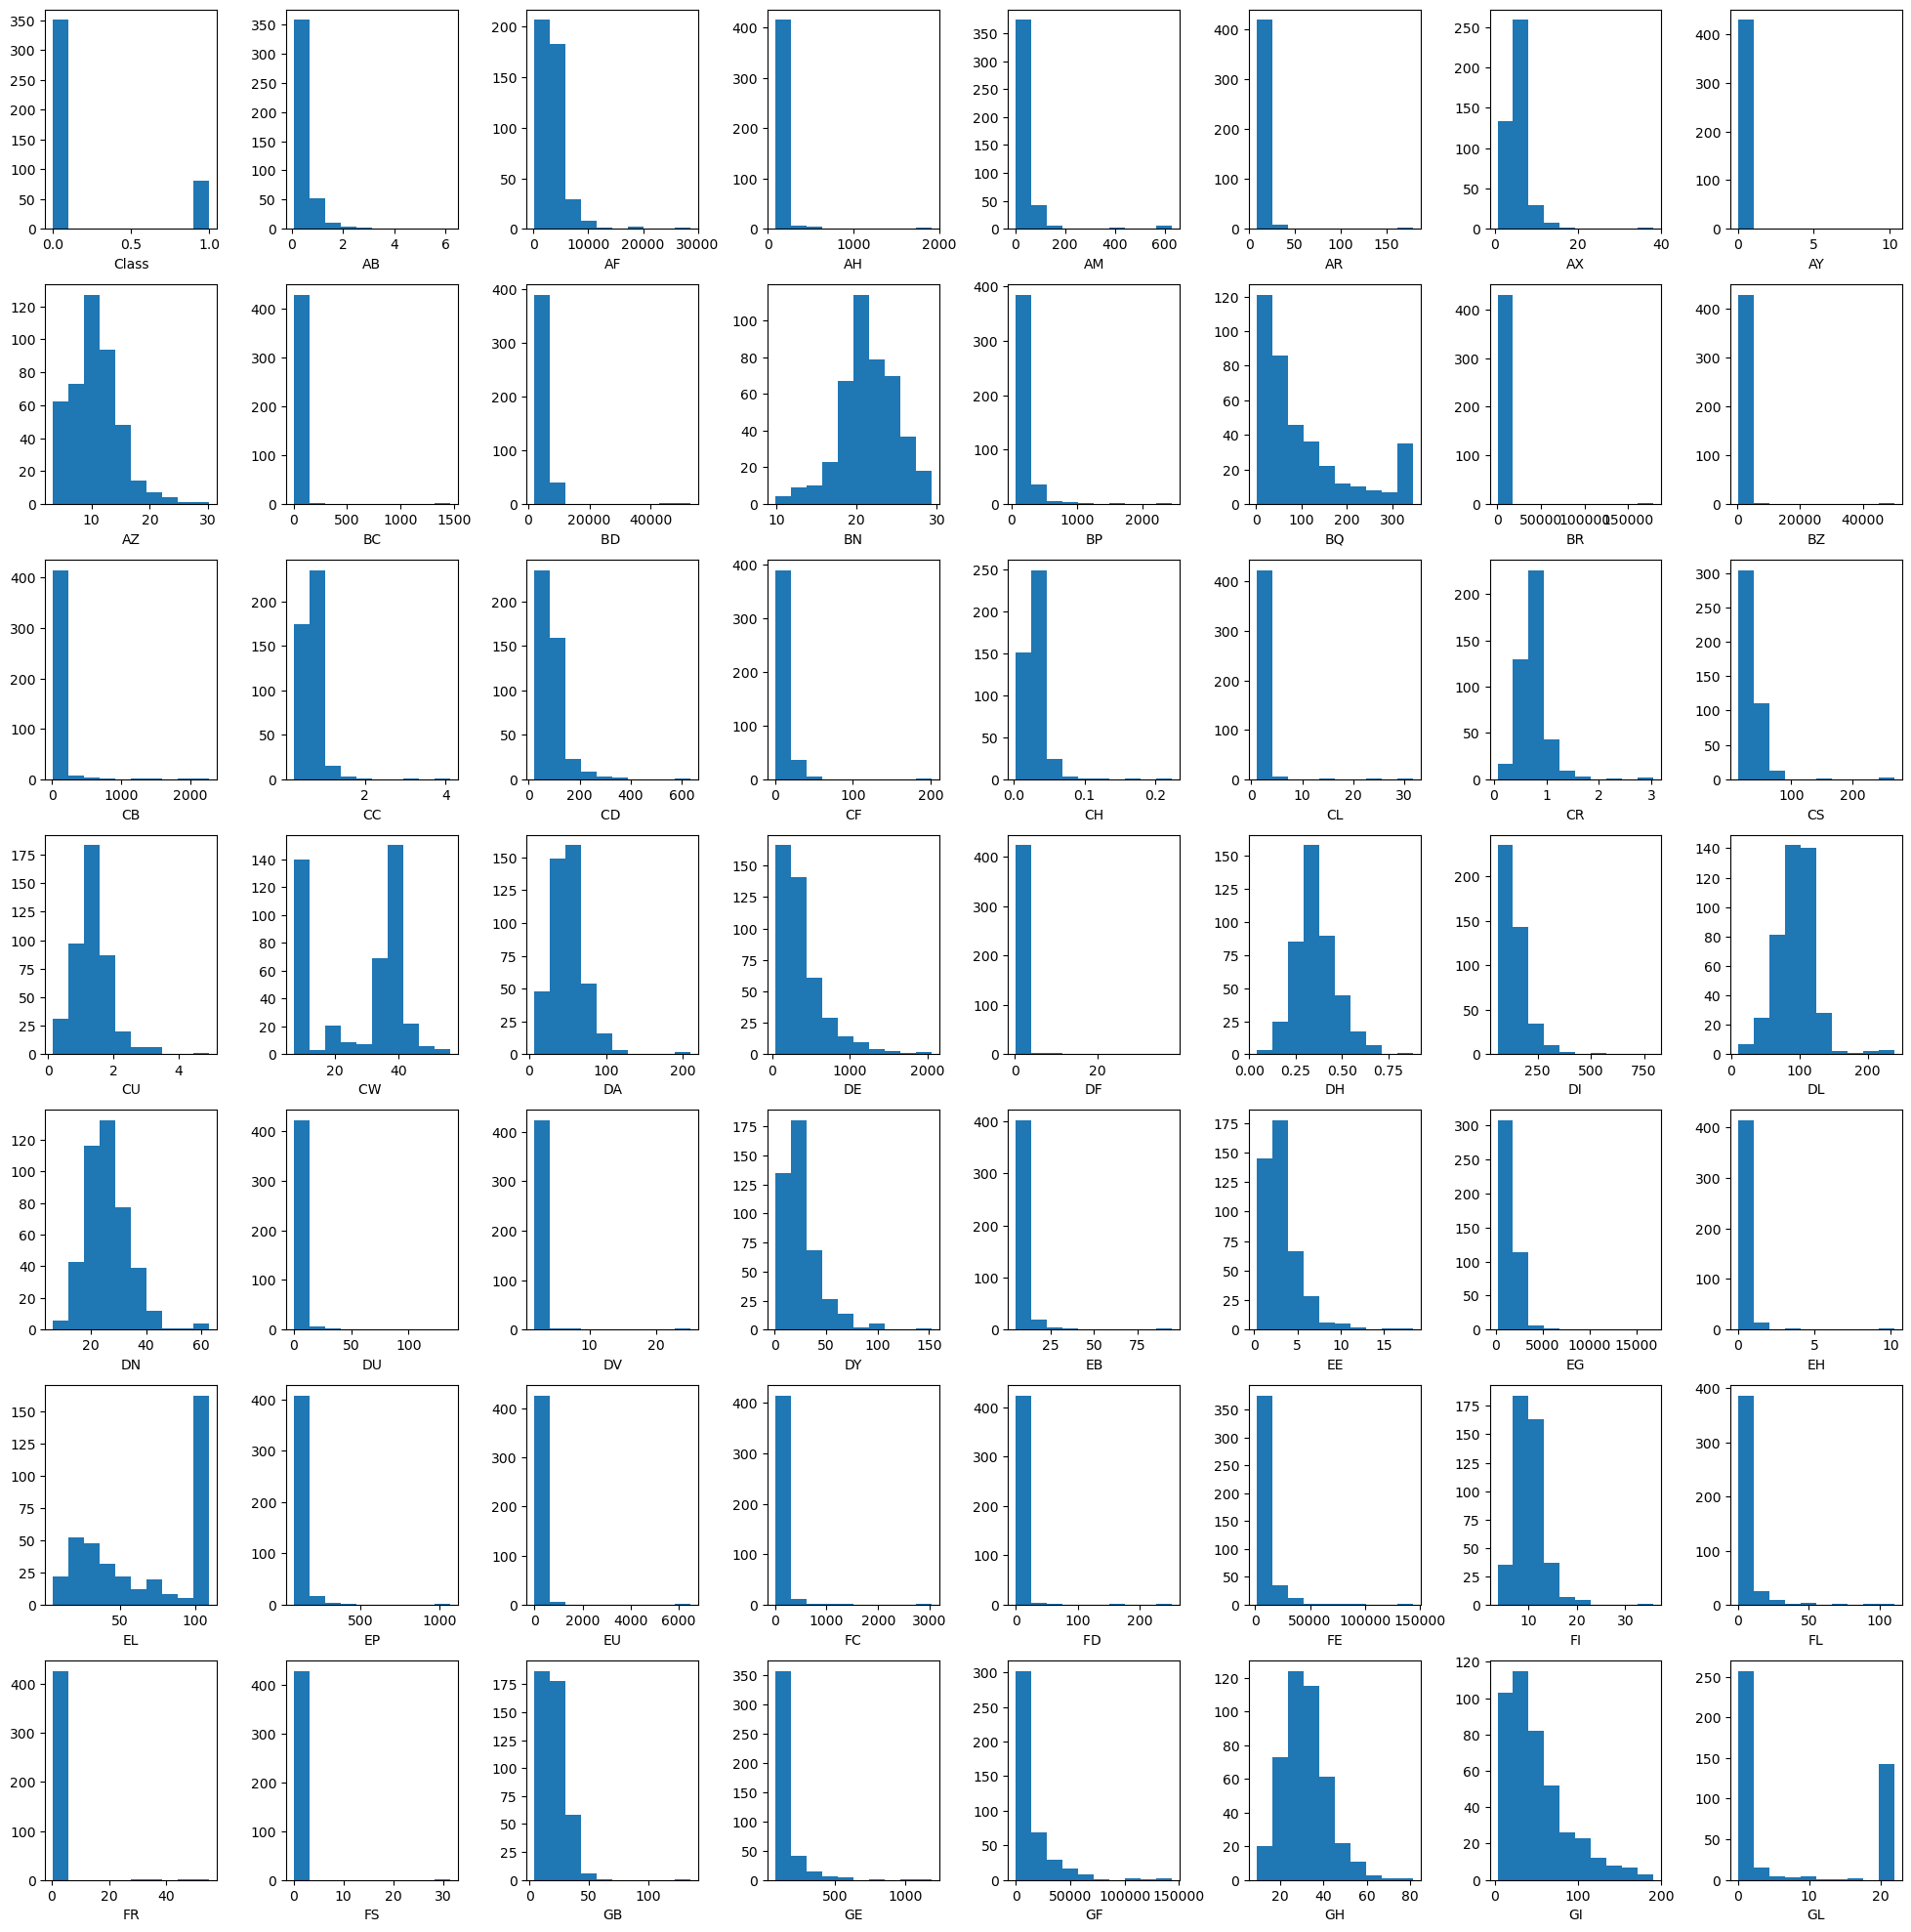

In [26]:
#check distributions of features and labels
columns = [i for i in df_train.columns]
fig, axes = plt.subplots(nrows=7, ncols=8, figsize=(20,20))
fig.tight_layout(pad=2.0)
for idx, ax in enumerate(axes.flatten()):
    ax.hist(df_train[columns[idx]])
    ax.set_xlabel(columns[idx])

### Step 6: Learning Model

### Step 7: Evaluation

### Conclusions